In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt
from matplotlib import gridspec
from rubiscos import PCC7942, MAIZE, RUBRUM, SPINACH
from pltconfig import *

In [2]:
# Rubisco kinetic data from Flamholz et al. Biochemistry 2019
rub_kinetics_df = pd.read_csv('data/fig1/Flamholz2019_DatasetS2_RubiscoKinetics_Merged.csv', index_col=0)

# Various operations and data for plotting purposes
group_mapping = {'C3 plants': 'C3 plants',
                 'C3-C4 plants': 'Other Form I',
                 'Cyanobacteria': 'Cyanobacteria',
                 'C4 plants': 'C4 plants',
                 'Gymnosperm': 'Other Form I',
                 'Basal angiosperm': 'Other Form I',
                 'Carnivorous plants': 'Other Form I',
                 'Bryophyte': 'Other Form I',
                 'CAM plants': 'Other Form I',
                 'Green algae': 'Other Form I',
                 'Diatoms': 'Other Form I',
                 'Chromophyte algae': 'Other Form I',
                 'Haptophyte algae': 'Other Form I',
                 'Rhodophyte algae': 'Other Form I',
                 'Macroalgae': 'Other Form I',
                 'Red algae': 'Red algae',
                 'Alphaproteobacteria': 'Other Form I',
                 'Betaproteobacteria': 'Other Form I',
                 'Gammaproteobacteria': 'Other Form I',
                }
color_mapping = {
    'C3-C4 plants': 'very light brown',
    'C4 plants': 'pea soup',
    'C3 plants': 'dusty green',
    'Other plants': 'grey/green',
    'Cyanobacteria': 'dark blue green',
    'Green algae': 'dusty teal',
    'Red algae': 'dusty red',
    'Diatoms': 'gunmetal',
    'Other algae': 'muddy brown',
    'Proteobacterial FI': 'dusty rose',
    'Other Form I': 'grey',
    'Form II': 'salmon',
}
fancy_labels = {
    'C3-C4 plants': '$C_3$-$C_4$ plants',
    'C4 plants': '$C_4$ plants',
    'C3 plants': '$C_3$ plants',
}
label2color = dict((fancy_labels.get(k, k), sns.xkcd_rgb[color_mapping.get(k)])
                   for k in color_mapping.keys())

F1_data = rub_kinetics_df[rub_kinetics_df.isoform == '1']
F2_data = rub_kinetics_df[rub_kinetics_df.isoform == '2']
grouped_taxa = F1_data.set_index('taxonomy').groupby(group_mapping)

# Order of plotting sets order of legend.
plotting_order = ['C3 plants', 'C4 plants', 'Red algae', 'Cyanobacteria', 'Other Form I']

grouped_taxa.mean()


,primary,mutant,KC,KC_SD,vC,vC_SD,S,S_SD,KO,KO_SD,...,vO_SD_reported,kon_C,kon_C_95CI_low,kon_C_95CI_high,kon_O,kon_O_95CI_low,kon_O_95CI_high,KRuBP,KRuBP_SD,temp_C
C3 plants,0.959821,0.0,14.692973,1.463573,3.154419,0.152448,97.015764,2.702906,479.416667,68.483974,...,0.045000,0.231750,0.189192,0.298518,0.002256,0.001807,0.003012,18.411111,1.797778,25.0
C4 plants,0.869565,0.0,21.434146,1.781951,4.385588,0.327353,80.535556,2.233333,508.322581,83.022581,...,NaN,0.230147,0.177550,0.303000,0.002953,0.002228,0.003975,18.150000,0.962500,25.0
Cyanobacteria,0.875000,0.0,165.159259,16.632963,9.005625,0.318250,47.803448,2.731034,814.789474,116.052632,...,0.326667,0.050020,0.041073,0.072253,0.001018,0.000784,0.001693,30.885714,3.390000,25.0
Other Form I,0.907692,0.0,32.277193,2.262807,3.362041,0.242512,80.533333,2.662500,655.061224,95.155102,...,NaN,0.178473,0.150921,0.212510,0.001733,0.001407,0.002182,21.355556,1.721111,25.0
Red algae,0.750000,0.0,8.642857,0.803429,1.700000,0.093686,177.250000,4.975000,374.000000,92.000000,...,NaN,0.255371,0.203786,0.328943,0.002200,0.001640,0.003020,68.000000,6.857500,25.0


In [3]:
# Specific rubiscos to plot data for. 
carb_color = greens[3]
ox_color = reds[-1]
net_fix_color = greens[-1]

# CO2 and O2 concentrations in uM
# CO2 concentrations range from ~10 uM to 1000 uM. 
# Henry's law at 25 C is ~15 uM for CO2
co2_concs = np.logspace(0.9, 3.1, 200)

# Henry's law at 25 C is ~270 uM for O2
o2_conc = 270

rubs = [SPINACH, PCC7942, RUBRUM]
rub_names = ['C$_3$ Plant ($S. oleracea$)',
             'Bacterial CCM ($S. elongatus$)',
             'Bacterial Form II ($R. rubrum$)']

/Users/flamholz/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/flamholz/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/flamholz/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

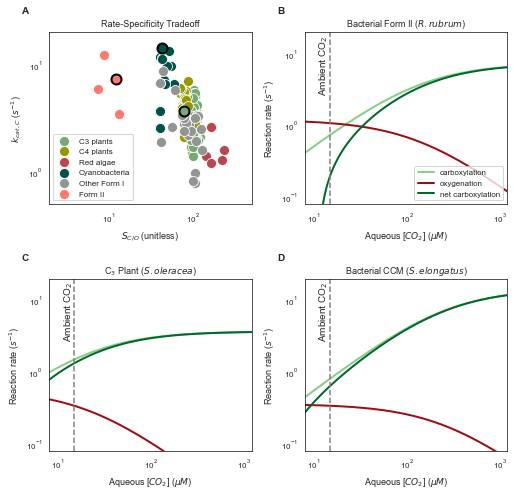

In [4]:
fig = plt.figure(figsize=(7.25, 7))
sns.set_style('white')
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax0 = fig.add_subplot(spec2[0, 0])
plt.title('Rate-Specificity Tradeoff', size=9)

plt.sca(ax0)
plt.xscale('log')
plt.yscale('log')

xvar, yvar = 'S', 'vC'
for group in plotting_order:
    gdf = grouped_taxa.get_group(group)

    cname = color_mapping.get(group, 'dark grey')
    c = sns.xkcd_rgb[cname]
    sns.scatterplot(gdf[xvar], gdf[yvar], s=100, c=[c], edgecolors='w', label=group)
    
group = 'Form II'
cname = color_mapping.get(group, 'dark grey')
c = sns.xkcd_rgb[cname]
sns.scatterplot(F2_data[xvar], F2_data[yvar], s=100, c=[c], edgecolors='w', label=group)

# Plot the 3 examples we will use
specific_rubs = [SPINACH, PCC7942, RUBRUM]
grps = ['C3 plants', 'Cyanobacteria', 'Form II']
for group, rub in zip(grps, specific_rubs):
    cname = color_mapping.get(group, 'dark grey')
    c = sns.xkcd_rgb[cname]
    plt.scatter(rub.S, rub.kcat_C, s=100, c=[c], edgecolors='k', lw=2)

plt.legend(fontsize=8)
plt.xlabel('$S_{C/O}$ (unitless)', fontsize=9)
plt.ylabel('$k_{cat,C}$ ($s^{-1}$)', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(2, 500)
plt.ylim(5e-1, 20)

ax1 = fig.add_subplot(spec2[1, 0])
ax2 = fig.add_subplot(spec2[1, 1])
ax3 = fig.add_subplot(spec2[0, 1])
rub_axs = [ax1, ax2, ax3]

for i, rub in enumerate(rubs):
    plt.sca(rub_axs[i])
    
    vc, vo = rub.vs(co2_concs, o2_conc)
    net_vc = vc - vo/2    
    title = rub_names[i]
    
    plt.title(title, size=9)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(co2_concs, vc, lw=2, c=carb_color, label='carboxylation')
    plt.plot(co2_concs, vo, lw=2, c=ox_color, label='oxygenation')
    plt.plot(co2_concs, net_vc, lw=2, c=net_fix_color, label='net carboxylation')

    plt.axvline(15, ls='--', lw=1.5, color='grey')
    plt.text(11, 3, 'Ambient CO$_2$', rotation=90, ha='left')

    plt.xlabel('Aqueous [$CO_2$] ($\mu M$)', fontsize=9)
    plt.ylabel('Reaction rate ($s^{-1}$)', fontsize=9)
        
    plt.xlim(8, 1200)
    plt.ylim(0.08, 20)
    plt.xticks([10, 100, 1000], fontsize=8)
    plt.yticks(fontsize=8)
    
    if 'rubrum' in title:
        plt.legend(fontsize=8, loc=4, fancybox=True, framealpha=0.8)

for l, ax in zip('ABCD', [ax0, ax3, ax1, ax2]):
    ax.text(-0.1, 1.15, l, transform=ax.transAxes,
          fontsize=10, fontweight='bold', va='top', ha='right')    
plt.tight_layout()

plt.savefig('fig1/fig1S1.png', dpi=300)
plt.show()